Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
input: drive/MyDrive/data/test/horse/105_0021.jpg


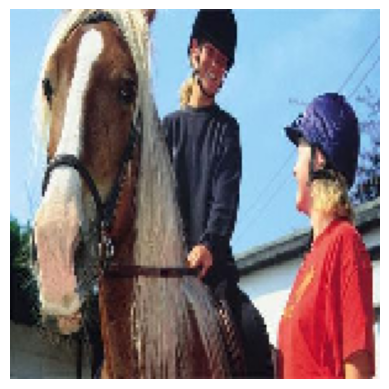

1/1 [==============================] - 1s 717ms/step
('horse', 0.88072073)
('zebra', 0.11927929)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# GoogleDriveをマウント
from google.colab import drive
drive.mount("/content/drive")

filename = "drive/MyDrive/data/test/horse/105_0021.jpg"
print('input:', filename)

# 画像サイズの設定
img_height, img_width = 150, 150

# 分類カテゴリ名の設定、学習時と同じ順番にする
classes = ['horse','zebra']
nb_classes = len(classes)

# 入力画像のロード
img = image.load_img(filename, target_size=(img_height, img_width))
x = image.img_to_array(img)

plt.imshow(img)
plt.axis("off")
plt.show()

# 4次元テンソルへ変換
x = np.expand_dims(x, axis=0)

# 入力データの正規化
x = x / 255.0

# ファインチューニングしたCNNモデルのロード
model = load_model('drive/MyDrive/finetuning.h5')

# 分類クラスを予測
pred = model.predict(x)[0]

# 予測結果を予測確率が上位2件分、カテゴリ名と予測確率を出力
top_n = 2
top_indices = pred.argsort()[-top_n:][::-1]
result = [(classes[i], pred[i]) for i in top_indices]
for x in result:
    print(x)